# Training Image Classifier

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from data_utils import *
from train_tools import *

import matplotlib.pyplot as plt



In [ ]:
root = '../Data/quickdraw'
dataloaders, dataset_sizes = quickdraw_setter(root=root, batch_size=256, num_workers=10)


----------------
### Sample Data Visualization

In [3]:
# batch example
images, labels = next(iter(dataloaders['test']))
print(images.shape)
print(labels.shape)

# dataset sizes
print(dataset_sizes)

torch.Size([256, 1, 28, 28])
torch.Size([256])
{'train': 1990000, 'test': 10000}


Example Label: alaram clock


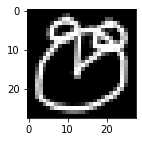

In [15]:
import random
idx = random.choice(range(256))

label = labels[idx].item()
label = dataloaders['test'].dataset.idx_to_class[label]
print('Example Label: %s' % label)
fig = plt.figure(figsize=(2,2))
plt.imshow(images[idx].permute(1, 2, 0), cmap='gray')

----
## Train Setups

In [2]:
model = resnet20(dim_in=1, num_classes=20)
model.eval()

ResNet was made


ResNet(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (block_layers): Sequential(
    (0): Sequential(
      (0): Block(
        (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (1): Block(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(

---
## Train Model

In [5]:
train_losses, test_losses, train_accs, test_accs = trainhandler.train_model(num_epochs=100)

[Epoch 1/100] Elapsed 758.992s/it
[Train] Loss - 0.9036, Acc - 70.00%, Learning Rate - 0.014999
[Test] Loss - 0.5821, Acc - 80.92%
[Epoch 2/100] Elapsed 461.254s/it
[Train] Loss - 0.6350, Acc - 78.78%, Learning Rate - 0.014997
[Test] Loss - 0.5126, Acc - 83.23%
[Epoch 3/100] Elapsed 394.365s/it
[Train] Loss - 0.5773, Acc - 80.71%, Learning Rate - 0.014993
[Test] Loss - 0.4693, Acc - 84.27%
[Epoch 4/100] Elapsed 394.35s/it
[Train] Loss - 0.5436, Acc - 81.79%, Learning Rate - 0.014988
[Test] Loss - 0.4444, Acc - 85.08%
[Epoch 5/100] Elapsed 394.592s/it
[Train] Loss - 0.5222, Acc - 82.49%, Learning Rate - 0.014982
[Test] Loss - 0.4416, Acc - 85.65%
[Epoch 6/100] Elapsed 394.432s/it
[Train] Loss - 0.5052, Acc - 83.04%, Learning Rate - 0.014973
[Test] Loss - 0.4210, Acc - 86.09%
[Epoch 7/100] Elapsed 394.563s/it
[Train] Loss - 0.4924, Acc - 83.46%, Learning Rate - 0.014964
[Test] Loss - 0.4064, Acc - 86.27%
[Epoch 8/100] Elapsed 394.522s/it
[Train] Loss - 0.4815, Acc - 83.82%, Learning Rate

-----------
## Results

In [8]:
# Saving Trained Model & Statistics

def as_list(tupled_list):
    return [elem[1] for elem in tupled_list]

best_acc = max(as_list(test_accs))

torch.save(trainhandler.model.state_dict(), './results/res20_{}.pth'.format(best_acc))

import json

result = {'train_loss': train_losses, 'train_acc': train_accs, 'test_loss': test_losses, 'test_acc' : test_accs}

with open('./res20_result.json', 'w') as f:
    json.dump(result, f)

-------------
### Train Graph

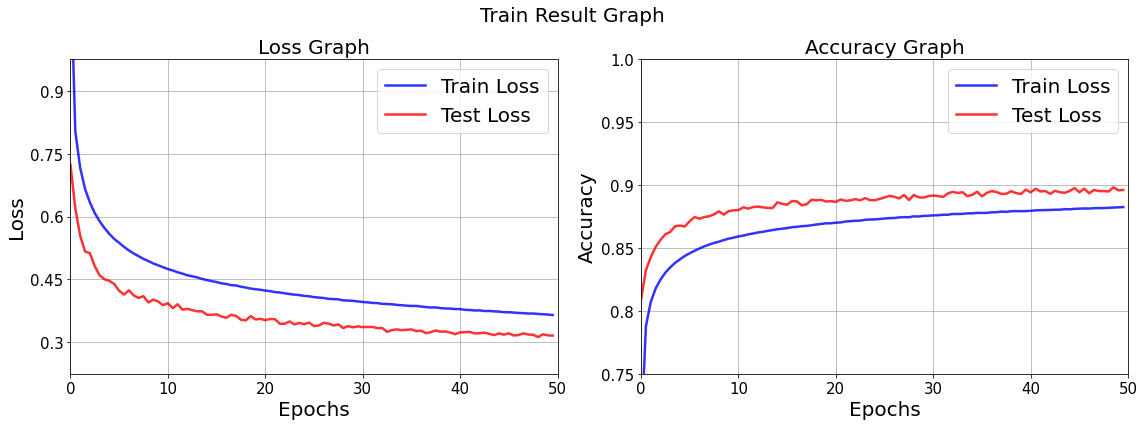

In [10]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

fig.suptitle('Train Result Graph', fontsize=20)

ax1.plot(result['train_loss'], linewidth=2.5, color='blue', alpha=0.8, label='Train Loss')
ax1.plot(result['test_loss'], linewidth=2.5, color='red', alpha=0.8, label='Test Loss')

ax1.set_ylabel('Loss', fontsize=20)
ax1.set_ylim(0.25, 0.75)
ax1.set_yticklabels([round(0.15*x, 2) for x in range(1, 7)], fontsize=15)

ax1.set_xlabel('Epochs', fontsize=20)
ax1.set_xlim(0, 100)
ax1.set_xticklabels([10*x for x in range(11)], fontsize=15)

ax1.set_title('Loss Graph', fontsize=20)
ax1.grid()
ax1.legend(fontsize=20)

ax2.plot(result['train_acc'], linewidth=2.5, color='blue', alpha=0.8, label='Train Loss')
ax2.plot(result['test_acc'], linewidth=2.5, color='red', alpha=0.8, label='Test Loss')

ax2.set_ylabel('Accuracy', fontsize=20)
ax2.set_ylim(0.75, 1.0)
ax2.set_yticklabels([0.75+0.05*x for x in range(6)], fontsize=15)

ax2.set_xlabel('Epochs', fontsize=20)
ax2.set_xlim(0, 100)
ax2.set_xticklabels([10*x for x in range(11)], fontsize=15)

ax2.set_title('Accuracy Graph', fontsize=20)
ax2.grid()
ax2.legend(fontsize=20)

plt.tight_layout()
plt.show()
fig.savefig('./results/graph.png')

-------------

## Representation Analysis

In [11]:
from umap import UMAP

def tensor_concater(tensor1, tensor2):
    if tensor1 is None:
        tensor1 = tensor2
    else:
        tensor1 = torch.cat((tensor1, tensor2), dim=0)
        
    return tensor1

rep_tensor, label_tensor = None, None

device='cuda:0'

# get stacked features & labels for 10000 test samples
with torch.no_grad():
    for data, labels in dataloaders['test']:
        data = data.to(device)
        _, features = model(data, get_features=True)
        rep_tensor = tensor_concater(rep_tensor, features.cpu())
        label_tensor = tensor_concater(label_tensor, labels.cpu())
        
print(rep_tensor.shape)

torch.Size([10000, 128])


In [12]:
# Embed to 2-dimensions
x_embed =UMAP(n_components=2).fit_transform(rep_tensor.numpy())

print(x_embed.shape)

(10000, 2)


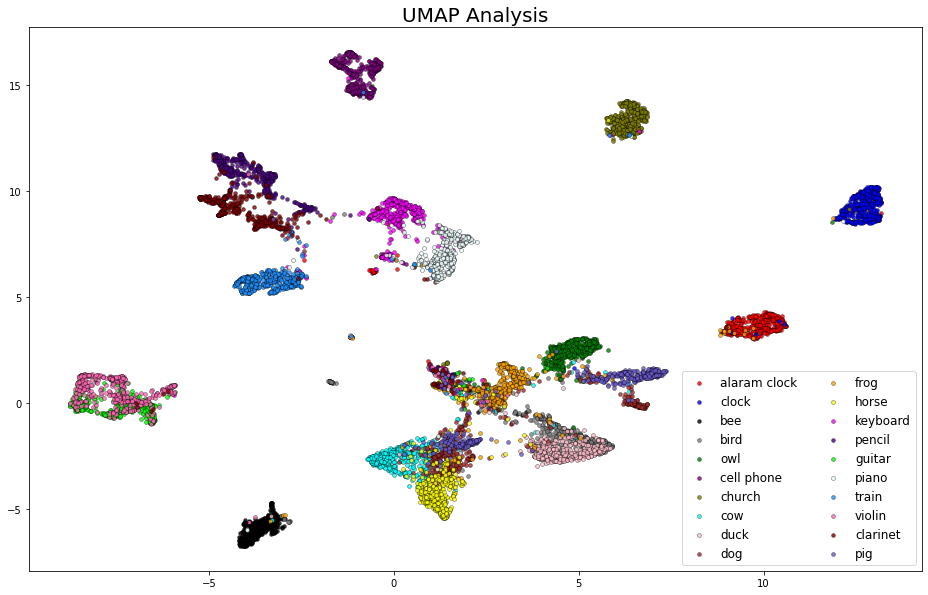

In [14]:
fig = plt.figure(figsize=(16,10))

label_names = dataloaders['test'].dataset.idx_to_class

colors = ['red', 'blue', 'black', 'gray', 'green', 
          'purple', 'olive', 'cyan', 'pink', 'brown', 
          'orange', 'yellow', 'magenta', 'indigo', 'lime',
         'azure', 'dodgerblue', 'hotpink', 'maroon', 'slateblue']

for i in range(20):
    y_i = label_tensor == i
    plt.scatter(x_embed[:,0][y_i], x_embed[:,1][y_i], color=colors[i], alpha=0.8, 
                s=15, edgecolor='black', linewidth=0.4, label=label_names[i])

plt.title('UMAP Analysis', fontsize=20)
#plt.ylim(0.5, 15)
#plt.xlim(-9, 13)
plt.legend(ncol=2, fontsize=12)
fig.savefig('./results/umap.png')

## Cumstom Image Prediction

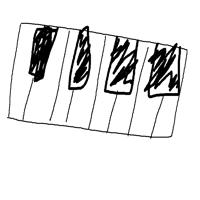

In [18]:
import PIL
import torchvision.transforms as transforms

# The conversion should work equally with a bitmap
img = PIL.Image.open("./gihun_piano.bmp")
rgb_im = PIL.ImageOps.grayscale(img)
rgb_im.resize((200,200))

In [247]:
import numpy as np

image = rgb_im.resize((28,28))

data = torch.Tensor(np.array(image)).view(-1, 1, 28, 28)
data = torch.Tensor(-data+255.0)/255.0
data = transforms.Normalize(mean=0.1767, std=0.3345)(data)

result = trainhandler.model(data.to('cuda:0'))
top10 = result.topk(k=10, dim=1)[1].tolist()
for i, elem in enumerate(top10[0]):
    print('Top %d prediction: %s' % (i, dataloaders['test'].dataset.idx_to_class[elem]))

Top 0 prediction: piano
Top 1 prediction: pencil
Top 2 prediction: church
Top 3 prediction: keyboard
Top 4 prediction: frog
Top 5 prediction: guitar
Top 6 prediction: clarinet
Top 7 prediction: train
Top 8 prediction: violin
Top 9 prediction: owl


-----------